Import the necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Take a look at the data

In [6]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Let's see how many different countries are in the dataset and what years the data are from.

In [35]:
list_of_countries = df.Country.unique()
print(list_of_countries)
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Let's see how these countries' life expectancy and GDP have changed over time.

In [41]:
def plotTimeLine(df, country):
    df_country = df[df.Country == country]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(country)
    ax1.plot(df_country['Year'], df_country['Life expectancy at birth (years)'])
    ax1.set_title('Life expectancy')
    ax2.plot(df_country['Year'], df_country['GDP'])
    ax2.set_title('GDP')

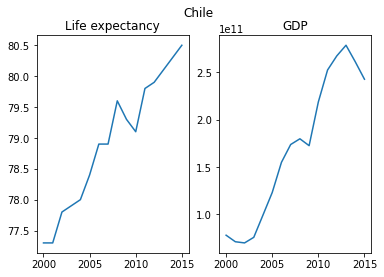

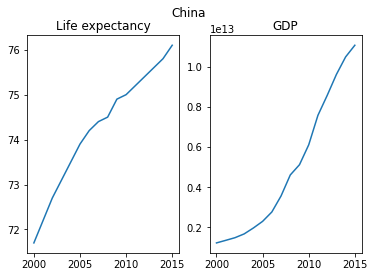

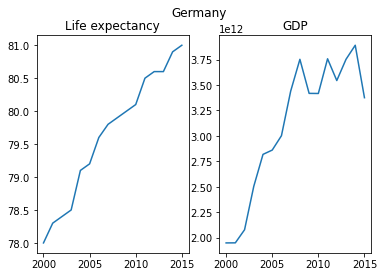

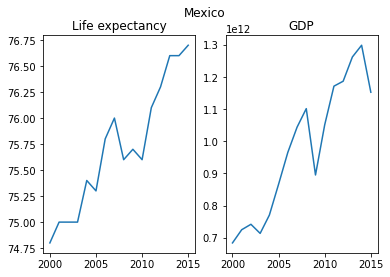

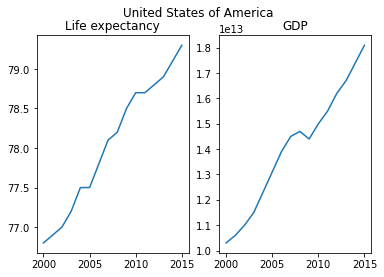

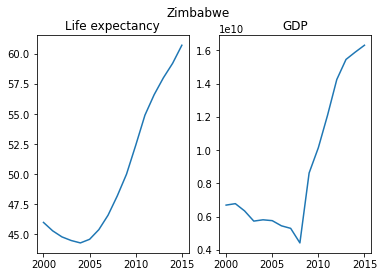

In [42]:
for country in list_of_countries:
    plotTimeLine(df, country)

It's clear from the data that, for these countries in the dataset, both the life expectancy and GDP tend to be increasing over time. There are some dips that are visible in both variables, indicating that they could be correlated.
Now I'll make a scatter plot to see the relationship between GDP and life expectancy. I'll distinguish the countries by hue.

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy at birth (years)'>

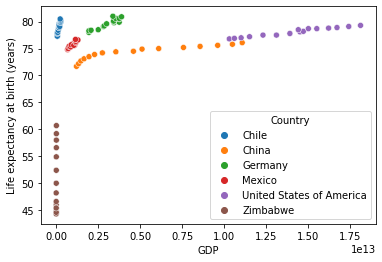

In [10]:
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df, hue='Country')

It looks like all the points for Zimbabwe have no GDP. We know that Zimbabwe does have a non-zero GDP, but it's so small compared to the larger countries that it looks like zero on the plot. If I want to see it better I should probably use a log scale for GDP.

<AxesSubplot:xlabel='logGDP', ylabel='Life expectancy at birth (years)'>

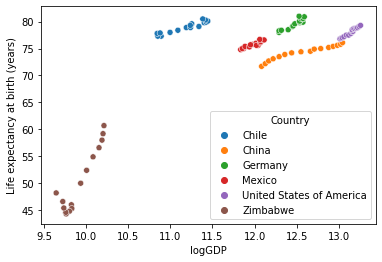

In [20]:
df['logGDP'] = np.log10(df['GDP'])
sns.scatterplot(x='logGDP', y='Life expectancy at birth (years)', data=df, hue='Country')

Clearly, we can't predict life expectancy from GDP alone and vice versa. There are many variables involved that are specific to each country that we don't have access to. One of those variables in the population. It would make more sense to use GDP per capita to compare between countries with different populations. I will extract the population information from the internet and find the GDP per capita.

Instead of adding in the population by hand, year by year, for each country, I'll just use the population in 2000 and the population in 2015 as endpoints of a linear function that estimates the population for each year. This will be much less tedious, and should be okay since the population estimates are not exact anyway. The numbers were taken from https://www.worldometers.info/population/

In [43]:
#Chile
Chile_pop_2000 = 15342353
Chile_pop_2015 = 17969353
#China
China_pop_2000 = 1290550765
China_pop_2015 = 1406847870
#Germany
Germany_pop_2000 = 81400882
Germany_pop_2015 = 81787411
#Mexico
Mexico_pop_2000 = 98899845
Mexico_pop_2015 = 121858258
#USA
USA_pop_2000 = 281710909
USA_pop_2015 = 320878310
#Zimbabwe
Zimbabwe_pop_2000 = 11881477
Zimbabwe_pop_2015 = 13814629

pops_2000 = [Chile_pop_2000, China_pop_2000, Germany_pop_2000, Mexico_pop_2000, USA_pop_2000, Zimbabwe_pop_2000]
pops_2015 = [Chile_pop_2015, China_pop_2015, Germany_pop_2015, Mexico_pop_2015, USA_pop_2000, Zimbabwe_pop_2015]

In [ ]:
def getGDPperCapita(country):
    

However, given the known values of life expectancy and GDP, we might be able to see how a small change in GDP affects the given life expectancy. I'll plot the increase in life expectancy versus the increase in GDP from year to year.

In [25]:
df_Chile = df[df.Country == 'Chile']
df_China = df[df.Country == 'China']
df_Germany = df[df.Country == 'Germany']
df_Mexico = df[df.Country == 'Mexico']
df_USA = df[df.Country == 'United States of America']
df_Zimbabwe = df[df.Country == 'Zimbabwe']

In [29]:
df_Chile.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
logGDP                              float64
dtype: object

In [26]:
df_Chile.set_index('GDP').diff()

TypeError: unsupported operand type(s) for -: 'str' and 'str'